In [2]:
import pandas as pd

df = pd.read_csv('explore.csv', encoding='ISO-8859-1')

In [3]:
print(df.columns)

print(df.shape[0])

Index(['% Boys Enrolled', '% Complete Primary Schools', '% Girls Enrolled',
       '% Primary Schools with single classroom',
       '% Primary Schools with single teacher', 'All Four Facilities',
       'Any One Facility', 'Any Three Facilities', 'Any Two Facilities',
       'Area (km²)', 'Bomb Blasts Occurred',
       'Boundary wall, Building condition satisfactory, Drinking water and 2 more (clusters)',
       'Boundary wall', 'Building condition satisfactory',
       'MeasureGroup 1 Measures', 'Color By Measure Value', 'Show Sheet',
       'Table of Contents', 'Other Factors Measure Value',
       'Analysis Level Selector', 'Color By Measure Name',
       'Complete Primary Schools', 'Country', 'City', 'Drinking water',
       'Drone attacks in Pakistan', 'Education score',
       'Educational Budget Spend of GDP', 'Electricity', 'Enrolment score',
       'Gender parity score', 'Global Terrorism Index - Pakistan',
       'Learning score', 'MeasureGroup 2 Measures', 'No Facility',
  

In [4]:
df.dtypes

% Boys Enrolled                                                                          object
% Complete Primary Schools                                                              float64
% Girls Enrolled                                                                         object
% Primary Schools with single classroom                                                 float64
% Primary Schools with single teacher                                                   float64
All Four Facilities                                                                      object
Any One Facility                                                                         object
Any Three Facilities                                                                     object
Any Two Facilities                                                                       object
Area (km²)                                                                              float64
Bomb Blasts Occurred                    

In [5]:
# Remove duplicates
df = df.drop_duplicates()

# Normalize column names: remove spaces and convert to lowercase
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [6]:
df.columns

Index(['%_boys_enrolled', '%_complete_primary_schools', '%_girls_enrolled',
       '%_primary_schools_with_single_classroom',
       '%_primary_schools_with_single_teacher', 'all_four_facilities',
       'any_one_facility', 'any_three_facilities', 'any_two_facilities',
       'area_(km²)', 'bomb_blasts_occurred',
       'boundary_wall,_building_condition_satisfactory,_drinking_water_and_2_more_(clusters)',
       'boundary_wall', 'building_condition_satisfactory',
       'measuregroup_1_measures', 'color_by_measure_value', 'show_sheet',
       'table_of_contents', 'other_factors_measure_value',
       'analysis_level_selector', 'color_by_measure_name',
       'complete_primary_schools', 'country', 'city', 'drinking_water',
       'drone_attacks_in_pakistan', 'education_score',
       'educational_budget_spend_of_gdp', 'electricity', 'enrolment_score',
       'gender_parity_score', 'global_terrorism_index_-_pakistan',
       'learning_score', 'measuregroup_2_measures', 'no_facility',
  

### Education Score
 ""To calculate the overall education score, the arithmetic average of the enrolment, survival, achievement and gender parity scores are used. Equal weight has been given to enrolment, achievement, attainment (survival rate) and gender parity". 


 ### School Infrastructure Score
 "school_infrastructure_score" "The district school rankings are developed on the basis of five indicators that reflect the availability of 
facilities: electricity, drinking water, toilets, boundary walls and the satisfactory/safe condition of the school building."

In [7]:
# # Remove duplicates
# df = df.drop_duplicates()

# # Normalize column names: remove spaces and convert to lowercase
# df.columns = df.columns.str.replace(' ', '_').str.lower()

# # Convert percentage strings to floats
# for col in df.columns:
#     if df[col].dtype == 'object':
#         # If the string ends with a '%', try to convert it to a float
#         if df[col].str.endswith('%').any():
#             try:
#                 df[col] = df[col].str.rstrip('%').astype('float') / 100.0
#             except ValueError:
#                 pass

# # Replace null values with the median
# df = df.fillna(df.median())


In [8]:
# Remove duplicates
df = df.drop_duplicates()

# Normalize column names: remove spaces and convert to lowercase
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Convert percentage strings to floats for certain columns
for col in df.columns:
    if df[col].dtype == 'object' and not col.startswith('%'):
        # If the string ends with a '%', try to convert it to a float
        if df[col].str.endswith('%').any():
            try:
                df[col] = df[col].str.rstrip('%').astype('float') / 100.0
            except ValueError:
                pass

# Now replace null values with the median
# For non-numeric columns, this operation will not have any effect
df = df.fillna(df.median())

# Exploratory Analysis

In [9]:
## Correlation Analysis

def correlation_with_education(df):
    if 'education_score' in df.columns:
        df_float = df.select_dtypes(include='float64')
        corr_matrix = df_float.corr()
        edu_score_corr = corr_matrix['education_score']

        return edu_score_corr
print(correlation_with_education(df))


%_complete_primary_schools                           0.455198
%_primary_schools_with_single_classroom             -0.358611
%_primary_schools_with_single_teacher               -0.474023
area_(km²)                                          -0.241740
boundary_wall                                        0.402711
building_condition_satisfactory                      0.464405
measuregroup_1_measures                              0.790505
color_by_measure_value                               0.790505
complete_primary_schools                             0.393225
drinking_water                                       0.451670
education_score                                      1.000000
electricity                                          0.461083
enrolment_score                                      0.714923
gender_parity_score                                  0.790505
global_terrorism_index_-_pakistan                    0.032451
learning_score                                       0.680596
measureg

In [10]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=["total","percent"])
missing_data.head()


,total,percent
area_(km²),68,0.117241
population,68,0.117241
primary_schools_with_single_teacher,4,0.006897
%_primary_schools_with_single_classroom,4,0.006897
%_primary_schools_with_single_teacher,4,0.006897


In [11]:
## Filling the Missing Values

filled_columns = {} # A dictionary to hold column names and the value they were filled with

for col in missing_data.index:
    if missing_data.loc[col, "total"] > 0:  # if there are missing values in the column
        median_val = df[col].median()  # calculate the median
        df[col].fillna(median_val, inplace=True)  # fill the missing values
        filled_columns[col] = median_val  # save the value used to fill

# Display the values that were used to fill each column
for column, value in filled_columns.items():
    print(f"The column '{column}' was filled with the value: {value}")

# Calculate new missing data stats
total_after = df.isnull().sum().sort_values(ascending=False)
percent_after = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data_after = pd.concat([total_after,percent_after],axis=1,keys=["total_after","percent_after"])

# Combine original missing data stats with new stats
missing_data_comparison = pd.concat([missing_data, missing_data_after], axis=1)

missing_data_comparison.head()


TypeError: could not convert string to float: '17.06%'

In [32]:
# Get Numerical Columns
len(df._get_numeric_data().columns)


33

In [33]:
# Get Categorical Columns
categorical_cols=df.columns[df.dtypes =='object']
print(len(categorical_cols))
print(categorical_cols)


18
Index(['%_boys_enrolled', '%_girls_enrolled', 'all_four_facilities',
       'any_one_facility', 'any_three_facilities', 'any_two_facilities',
       'boundary_wall,_building_condition_satisfactory,_drinking_water_and_2_more_(clusters)',
       'show_sheet', 'table_of_contents', 'other_factors_measure_value',
       'analysis_level_selector', 'color_by_measure_name', 'country', 'city',
       'educational_budget_spend_of_gdp', 'no_facility',
       'pakistan_economic_growth', 'province'],
      dtype='object')


There are 33 numeric columns and 18 categorical columns.

In [15]:
# In Percentages
correlation_with_education(df)*100

%_complete_primary_schools                            45.519837
%_primary_schools_with_single_classroom              -35.928086
%_primary_schools_with_single_teacher                -47.441813
area_(km²)                                           -18.102700
boundary_wall                                         40.271054
building_condition_satisfactory                       46.440473
measuregroup_1_measures                               79.050522
color_by_measure_value                                79.050522
complete_primary_schools                              39.322514
drinking_water                                        45.166967
education_score                                      100.000000
electricity                                           46.108298
enrolment_score                                       71.492314
gender_parity_score                                   79.050522
global_terrorism_index_-_pakistan                      3.245071
learning_score                          

### Plot that shows correlation

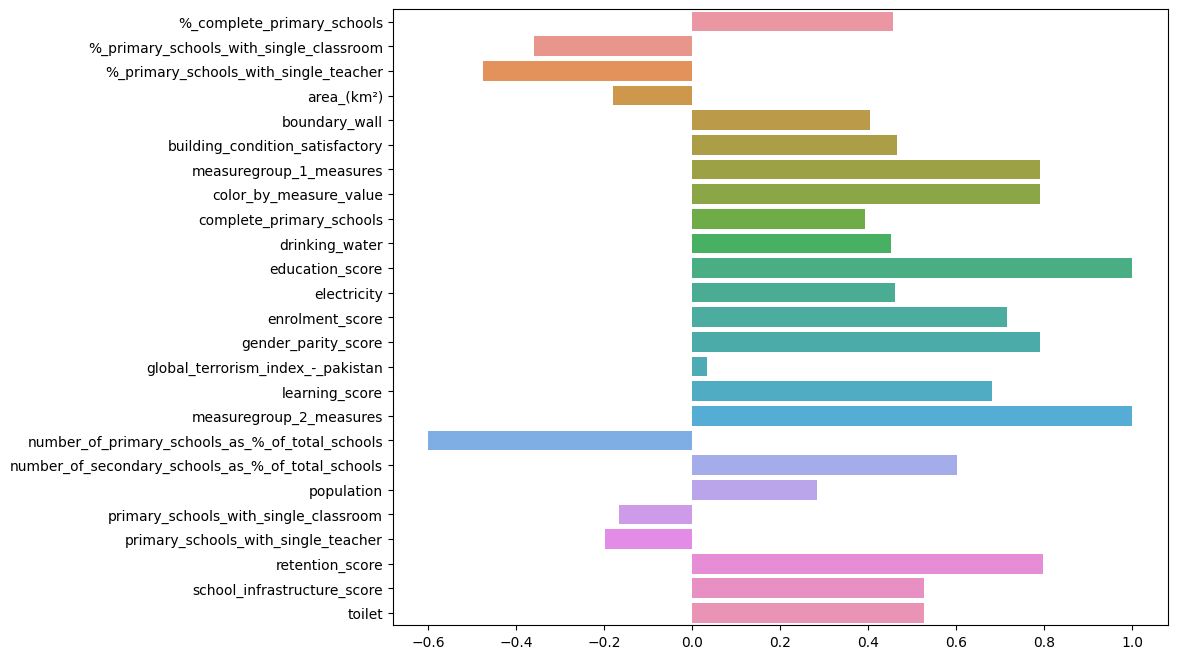

In [17]:
# Bar Plot
import seaborn as sns
import matplotlib.pyplot as plt


def visualize_correlation_with_education(df):
    if 'education_score' in df.columns:
        df_float = df.select_dtypes(include='float64')
        
        corr_matrix = df_float.corr()

        edu_score_corr = corr_matrix['education_score']

        fig, ax = plt.subplots(figsize=(10, 8))

        sns.barplot(x=edu_score_corr.values, y=edu_score_corr.index, ax=ax)
        
visualize_correlation_with_education(df)

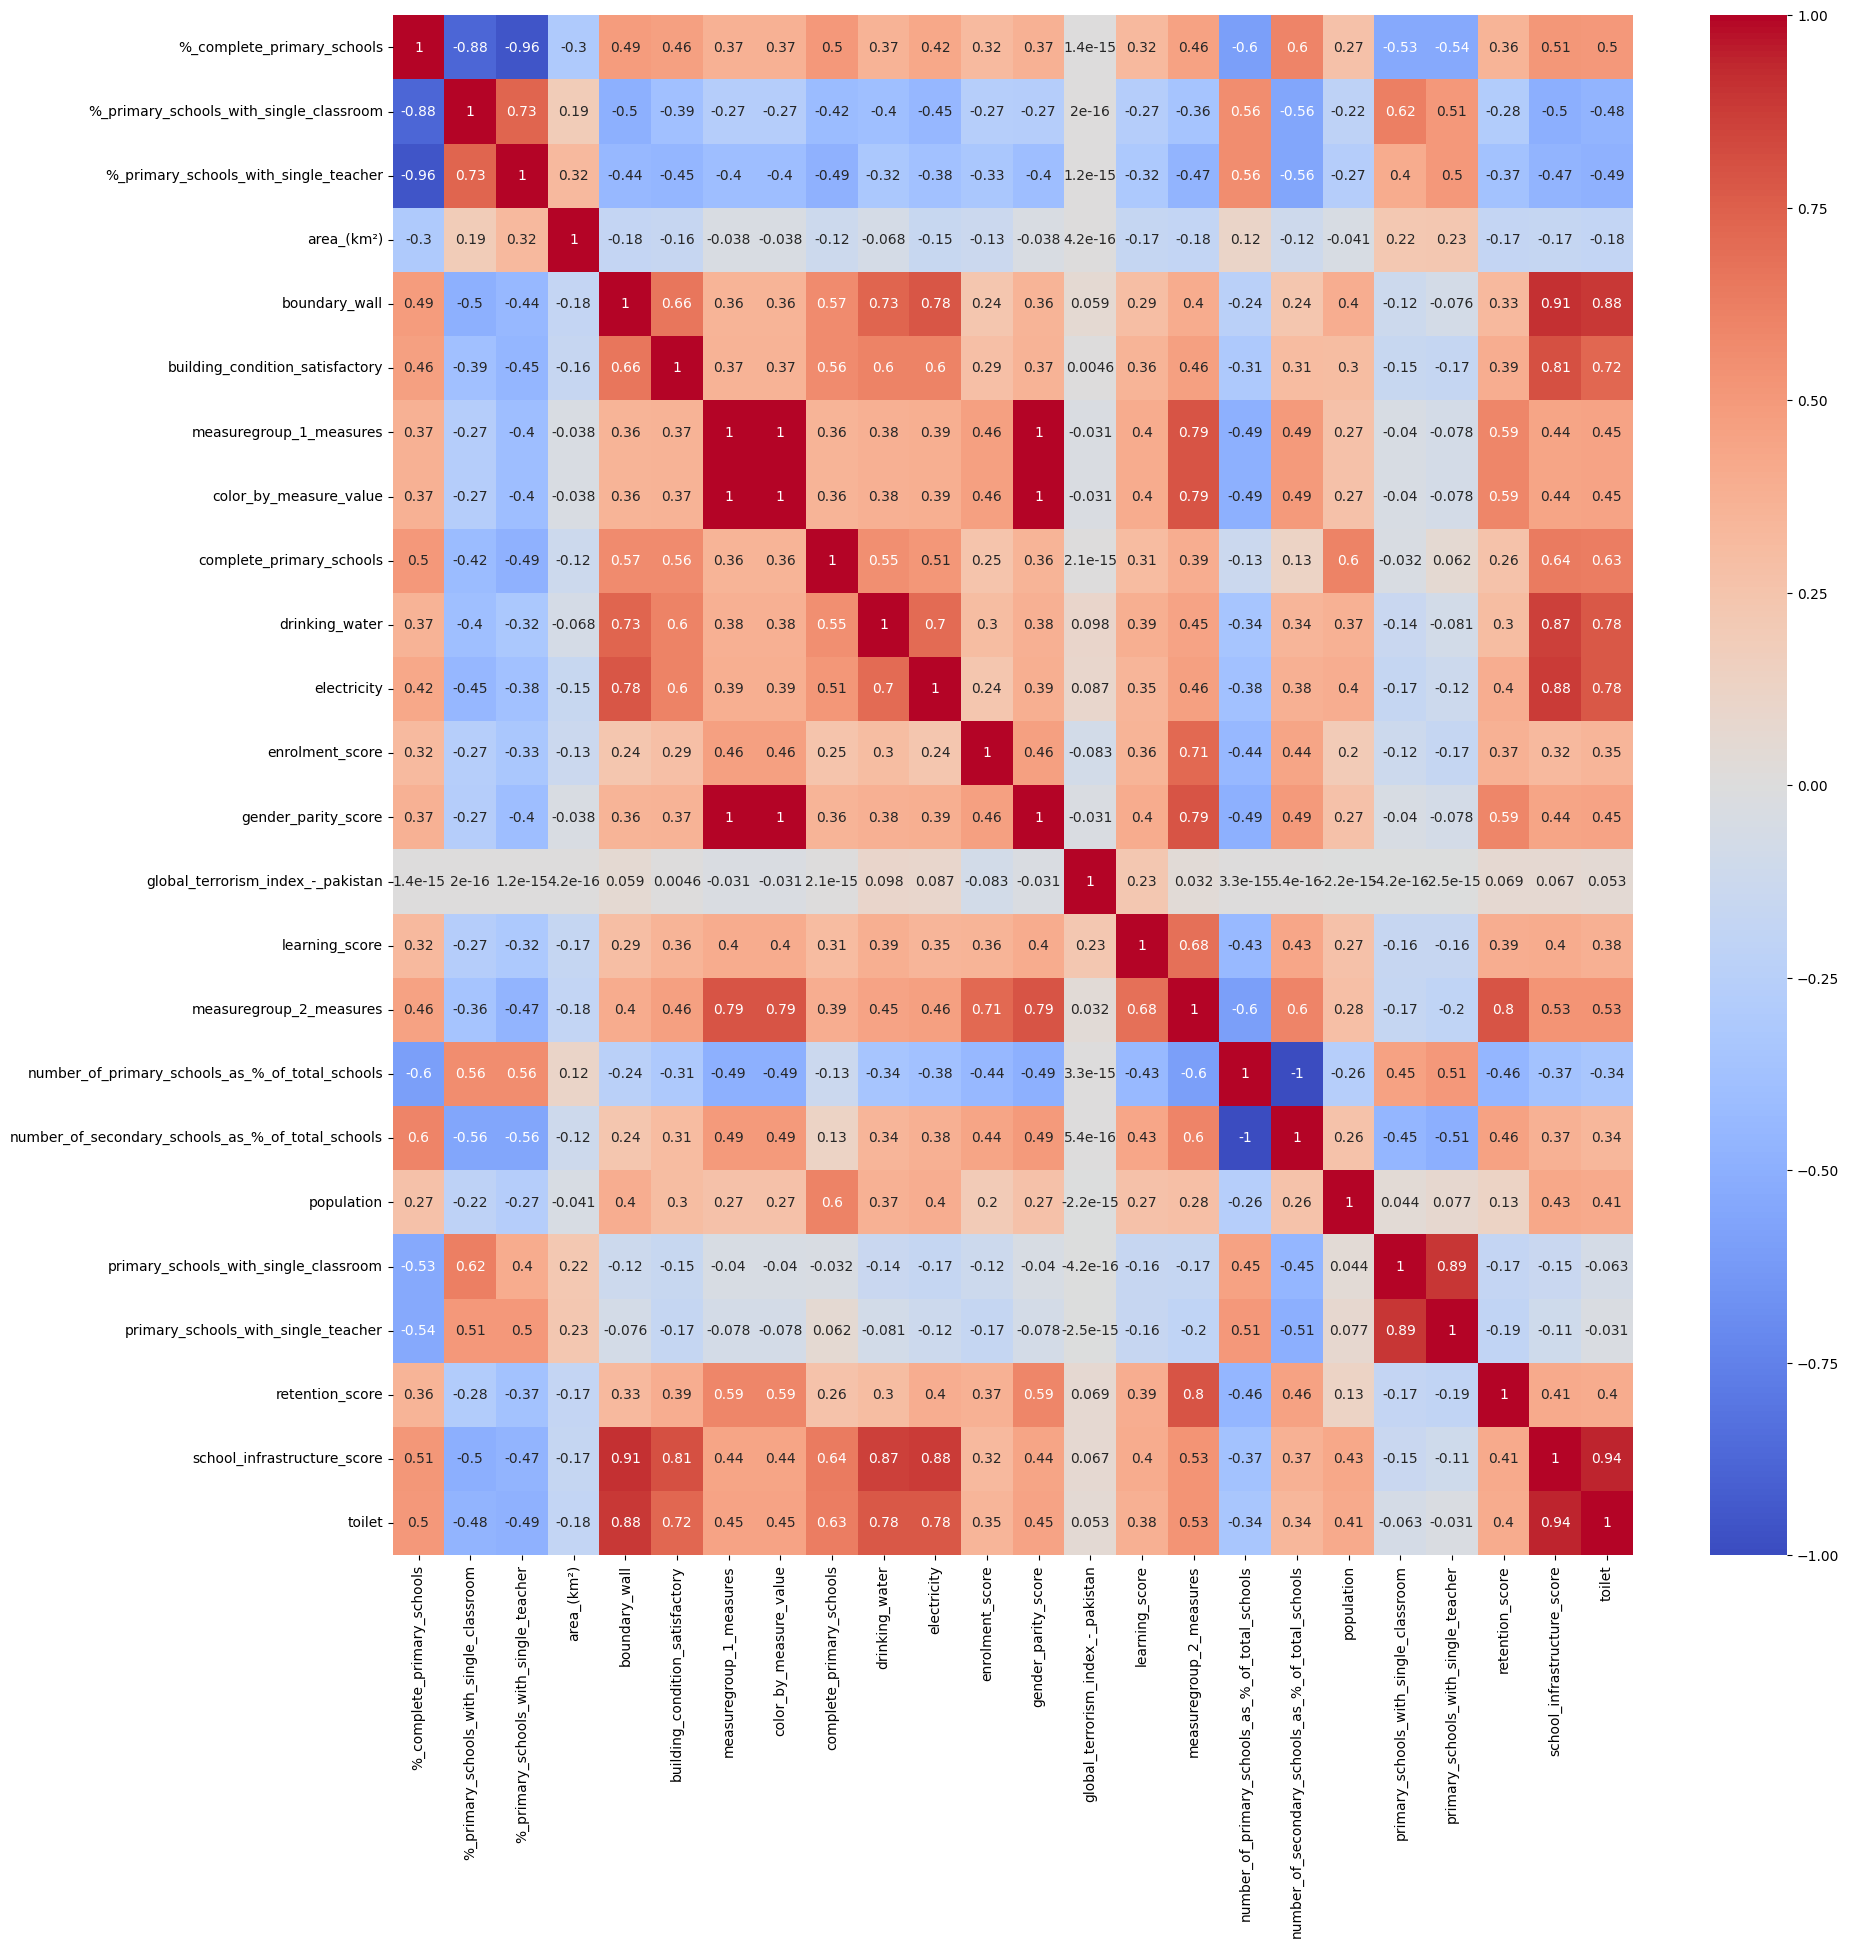

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize a HeatMap
def visualize_correlation_with_education(df):
    if 'education_score' in df.columns:
        df_float = df.select_dtypes(include='float64')
        
        corr_matrix = df_float.corr()

        fig, ax = plt.subplots(figsize=(20, 20))

        sns.heatmap(corr_matrix, ax=ax, annot=True, cmap='coolwarm')
        
visualize_correlation_with_education(df)


# PreProcessing

In [19]:
import pandas as pd
import numpy as np

# Convert 'education_score' to category
# We're doing this so we can do logistic regression
# Lo = 0, Medium = 1 and High = 2
df['education_score'] = pd.cut(df['education_score'], bins=[0, 33, 66, 100], labels=['Low', 'Medium', 'High'])

# Convert categories to numerical labels for a Machine LEarning model
df['education_score'], class_names = pd.factorize(df['education_score'])

# Split the dataset into features (X) and target variable (y)
X = df[['school_infrastructure_score']]
y = df['education_score']

# Training and Validation

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Develop the Model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score, recall_score, f1_score


In [22]:

# Train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Validate the model
y_val_pred = log_reg.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')


Validation Accuracy: 0.6666666666666666


# HyperParameter Tuning

In [23]:
# param_grid = {
#     'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#     'C' : np.logspace(-4, 4, 20),
#     'solver' : ['lbfgs', 'newton-cg', 'sag', 'saga'],
#     'max_iter' : [100, 500, 1000]
# }
# compatible_solver_penalty = [
#     ('lbfgs', 'l2'), 
#     ('lbfgs', 'none'), 
#     ('newton-cg', 'l2'), 
#     ('newton-cg', 'none'), 
#     ('sag', 'l2'), 
#     ('sag', 'none'), 
#     ('saga', 'l1'), 
#     ('saga', 'l2'), 
#     ('saga', 'elasticnet'), 
#     ('saga', 'none')
# ]

# param_grid_adjusted = [ 
#     {'solver': [solver], 'penalty': [penalty], 'C': param_grid['C'], 'max_iter': param_grid['max_iter']} 
#     for solver, penalty in compatible_solver_penalty
# ]

# grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid_adjusted, cv=5, scoring='accuracy', error_score=0)
# grid_search.fit(X_train, y_train)



In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
params = {
    'n_neighbors': [3,5,7,9,11,13],
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}

clf = GridSearchCV(
    estimator=knn,
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)

clf.fit(X_train, y_train)

best_params = clf.best_params_
print(f'Best parameters: {best_params}')


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression()
params = [
    {'solver': ['newton-cg', 'lbfgs', 'sag'], 'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    {'solver': ['saga'], 'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
]

clf = GridSearchCV(
    estimator=log_reg,
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)

clf.fit(X_train, y_train)

best_params = clf.best_params_
print(f'Best parameters: {best_params}')

log_reg_best = LogisticRegression(**best_params)
log_reg_best.fit(X_train, y_train)


NameError: name 'X_train' is not defined

In [26]:
# Use the best parameters from GridSearchCV to fit the model
log_reg_best = LogisticRegression(**best_params)
log_reg_best.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

In [27]:
# Evaluate the model
y_test_pred = log_reg_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.6896551724137931


In [28]:
# Train Model
y_test_pred = log_reg_best.predict(X_train)
test_accuracy = accuracy_score(y_train, y_test_pred)

print(f'Train Accuracy: {test_accuracy}')

Train Accuracy: 0.7068965517241379


In [29]:
# Assuming you have the test dataset (X_test, y_test) and the fitted model 'best_model'
y_pred = log_reg_best.predict(X_test)

# Precision
precision = precision_score(y_test, y_pred, average='weighted') # 'weighted' takes class imbalance into account
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

Precision: 0.6759320660182729
Recall: 0.6896551724137931
F1 Score: 0.682308330370897


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


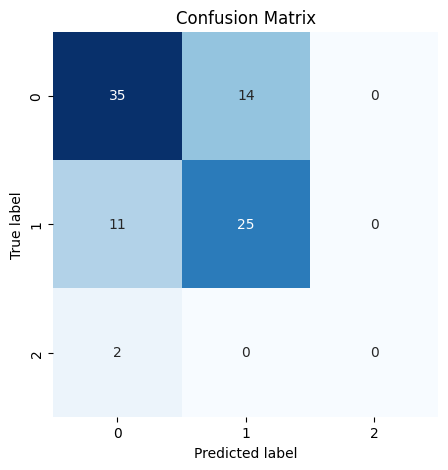

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
y_pred = log_reg_best.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix using seaborn's heatmap function
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', square=True, cmap='Blues', cbar=False)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()
